In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1-27-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1-29-2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2-22-2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.shape

(1000, 17)

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


# Total Branches

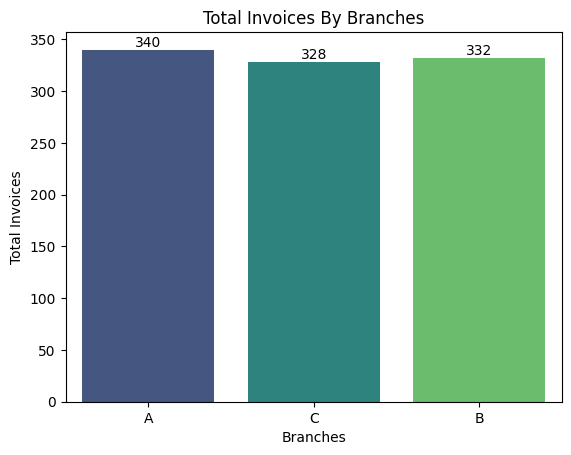

In [10]:
branch = sns.countplot(x='Branch', data=df, palette='viridis')
for bars in branch.containers:
    branch.bar_label(bars)
plt.title('Total Invoices By Branches')  
plt.xlabel('Branches')
plt.ylabel('Total Invoices')
plt.grid(False)

# Total Cities

Text(0.5, 1.0, 'Total Invoices By Cities')

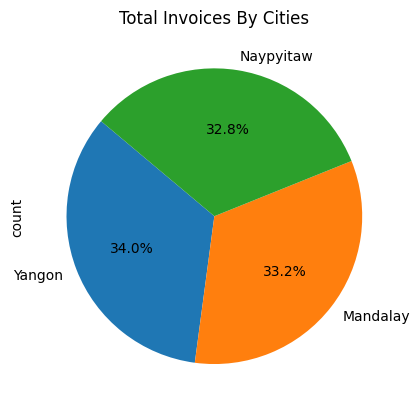

In [11]:
df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Invoices By Cities')  

In [12]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [13]:
df['Month']=df['Date'].dt.month

In [14]:
invoice_by_month=df.groupby('Month')['Invoice ID'].count()
invoice_by_month

Month
1    352
2    303
3    345
Name: Invoice ID, dtype: int64

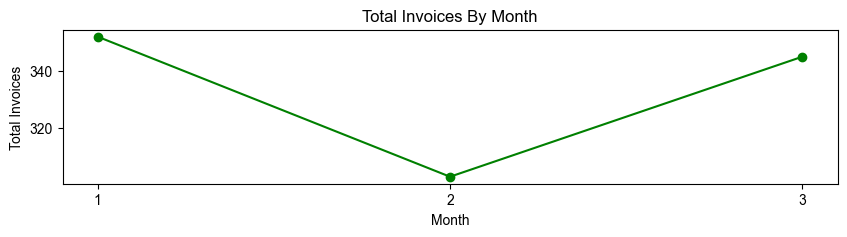

In [15]:
plt.figure(figsize=(10,2))
plt.plot(invoice_by_month.index, invoice_by_month.values, marker='o', color='green')
plt.title('Total Invoices By Month')  
plt.xlabel('Month')
plt.ylabel('Total Invoices')
sns.set_style("whitegrid")
plt.grid(False)
plt.xticks(invoice_by_month.index)
plt.show()

# Total Invoices By Gender

Text(0, 0.5, 'Total Invoices')

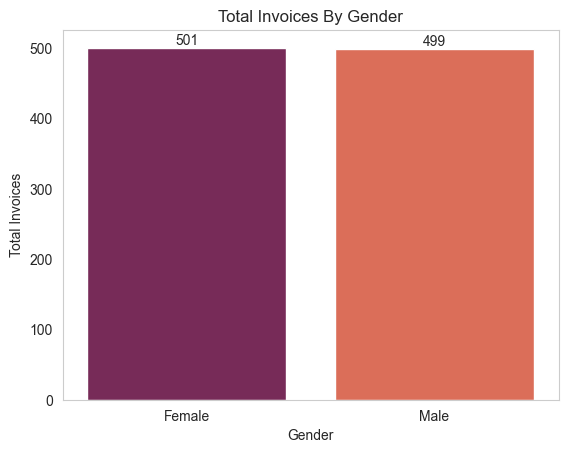

In [16]:
gender = sns.countplot(x='Gender', data=df, palette='rocket')
for bars in gender.containers:
    gender.bar_label(bars)
plt.title('Total Invoices By Gender')  
plt.xlabel('Gender')
plt.grid(False)
plt.ylabel('Total Invoices')

# Total Invoices By Product Line

Text(0, 0.5, 'Total Invoices')

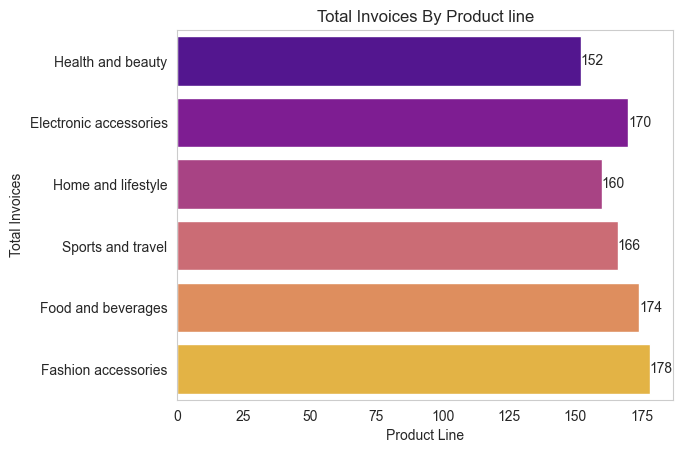

In [17]:
product = sns.countplot(y=df['Product line'], data=df, palette='plasma')
for bars in product.containers:
    product.bar_label(bars)
plt.title('Total Invoices By Product line')  
plt.xlabel('Product Line')
plt.grid(False)
plt.ylabel('Total Invoices')

# Total Product line By Gender

Text(0, 0.5, 'Total Invoices')

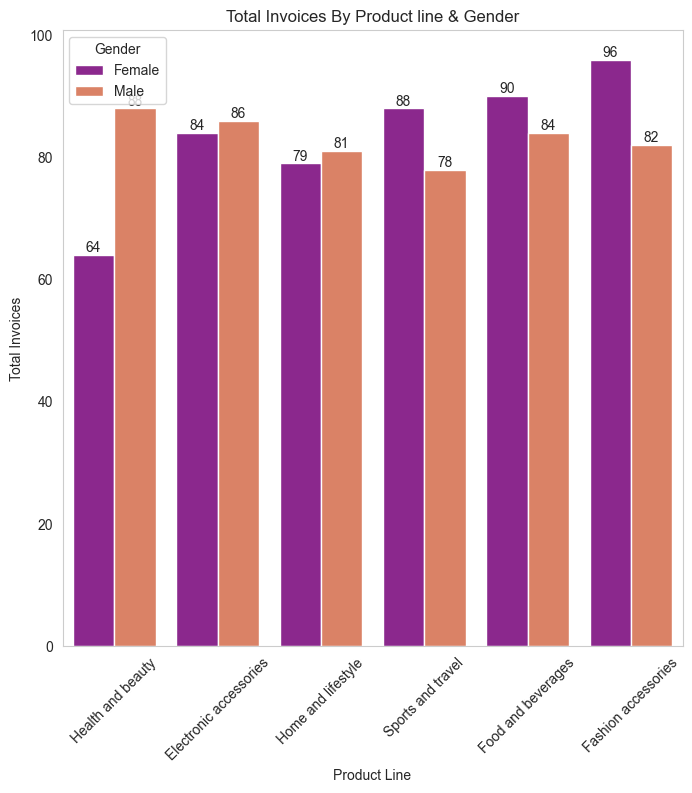

In [18]:
plt.figure(figsize=(8,8))
product = sns.countplot(x=df['Product line'], data=df, hue=df['Gender'], palette='plasma')
for bars in product.containers:
    product.bar_label(bars)
plt.title('Total Invoices By Product line & Gender')  
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.grid(False)
plt.ylabel('Total Invoices')

# Total Amount spend By Gender

In [19]:
amount_gender = df.groupby('Gender')['Total'].sum()
amount_gender

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

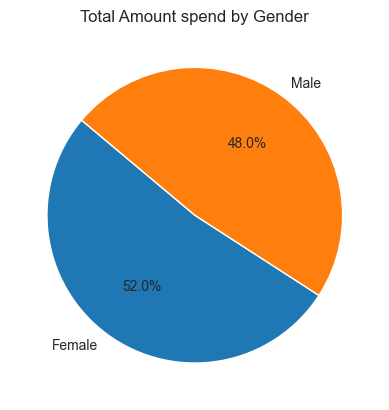

In [20]:
plt.pie(amount_gender, labels=amount_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Amount spend by Gender')
plt.show()

# Average Unit Price Of Each Product Line

In [21]:
product_unit_price = df.groupby('Product line')['Unit price'].mean().sort_values(ascending=False)
product_unit_price

Product line
Fashion accessories       57.153652
Sports and travel         56.993253
Food and beverages        56.008851
Home and lifestyle        55.316937
Health and beauty         54.854474
Electronic accessories    53.551588
Name: Unit price, dtype: float64

In [22]:
product_unit_price_avg = product_unit_price.round(2)
product_unit_price_avg

Product line
Fashion accessories       57.15
Sports and travel         56.99
Food and beverages        56.01
Home and lifestyle        55.32
Health and beauty         54.85
Electronic accessories    53.55
Name: Unit price, dtype: float64

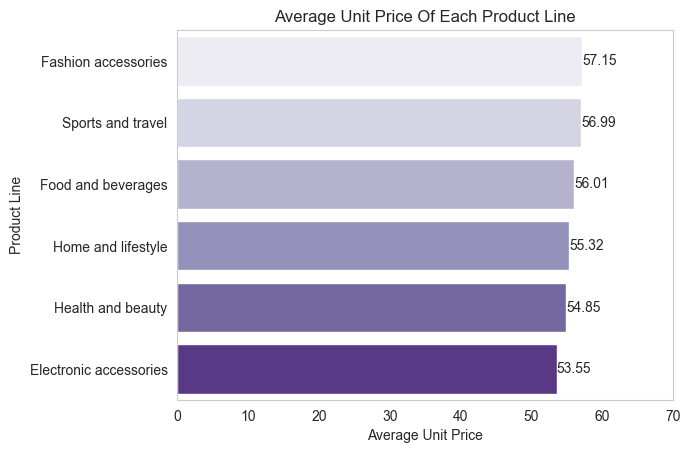

In [23]:
bar1=sns.barplot(x=product_unit_price_avg.values, y=product_unit_price_avg.index, orient='horizontal', palette='Purples')
plt.bar_label(bar1.containers[0], labels=product_unit_price_avg.values, label_type='edge')
plt.title('Average Unit Price Of Each Product Line')  
plt.ylabel('Product Line')
plt.xlabel('Average Unit Price')
plt.xlim(0, 70)
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Unit Price By Product Line

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

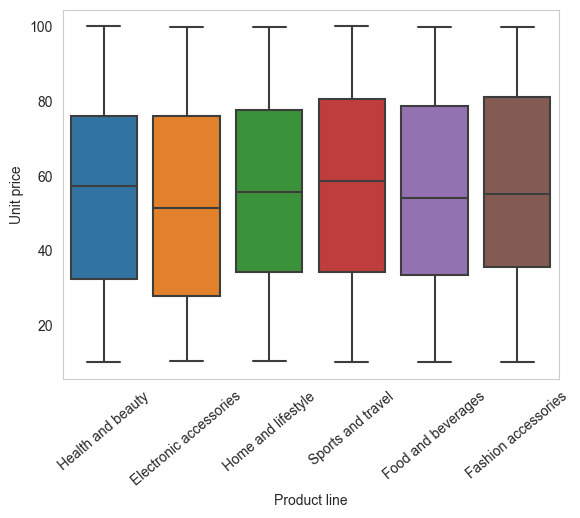

In [24]:
sns.boxplot(x=df['Product line'], y=df['Unit price'])
plt.grid(False)
plt.xticks(rotation=40)

# Quantity By Product Line

In [25]:
quantity_product = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=True)
quantity_product

Product line
Health and beauty         854
Fashion accessories       902
Home and lifestyle        911
Sports and travel         920
Food and beverages        952
Electronic accessories    971
Name: Quantity, dtype: int64

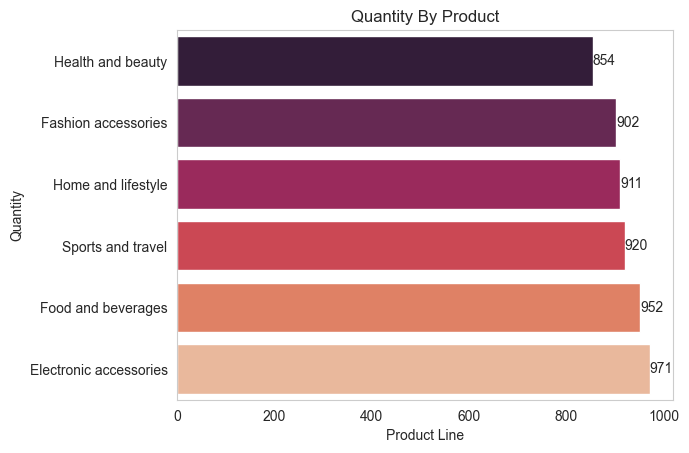

In [26]:
bar2= sns.barplot(x=quantity_product.values, y=quantity_product.index, orient='horizontal', palette='rocket')
plt.bar_label(bar2.containers[0], labels=quantity_product.values, label_type='edge')
plt.title('Quantity By Product')  
plt.xlabel('Product Line')
plt.ylabel('Quantity')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

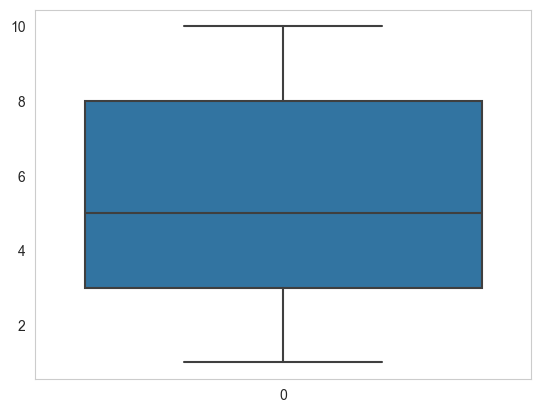

In [27]:
sns.boxplot(df['Quantity'])
plt.grid(False)

# Total Amount By Product Line

In [28]:
total_by_product = df.groupby('Product line')['Total'].sum().sort_values(ascending=True)
total_by_product

Product line
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Fashion accessories       54305.8950
Electronic accessories    54337.5315
Sports and travel         55122.8265
Food and beverages        56144.8440
Name: Total, dtype: float64

In [29]:
total_by_product_r = total_by_product.round()

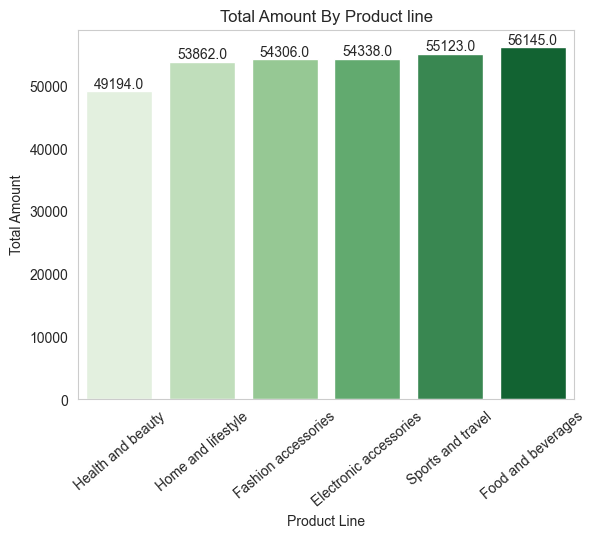

In [30]:
bar3= sns.barplot(y=total_by_product_r.values, x=total_by_product_r.index, orient='vertical', palette='Greens')
plt.bar_label(bar3.containers[0], labels=total_by_product_r.values, label_type='edge')
plt.title('Total Amount By Product line')  
plt.xlabel('Product Line')
plt.ylabel('Total Amount')
plt.xticks(rotation=40)
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Total Tax & Amount By Product Line

In [31]:
total_tax_product= df.groupby('Product line')[['Total','Tax 5%']].sum()
total_tax_product

,Total,Tax 5%
Product line,,
Electronic accessories,54337.5315,2587.5015
Fashion accessories,54305.8950,2585.9950
Food and beverages,56144.8440,2673.5640
Health and beauty,49193.7390,2342.5590
Home and lifestyle,53861.9130,2564.8530
Sports and travel,55122.8265,2624.8965


# Total Amount By Tax

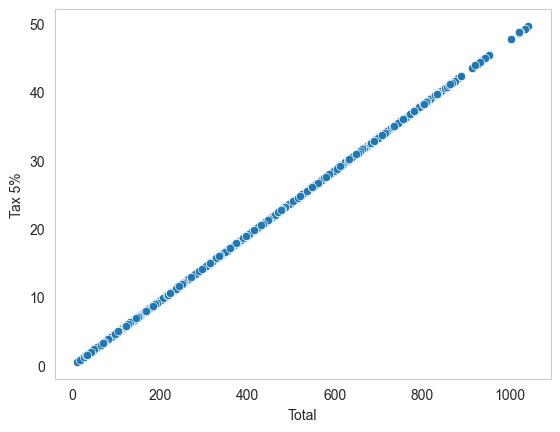

In [32]:
sns.scatterplot(x=df['Total'], y=df['Tax 5%'])
plt.grid(False)

C:\Users\utkar\AppData\Local\Temp\ipykernel_4696\4168796838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total'])


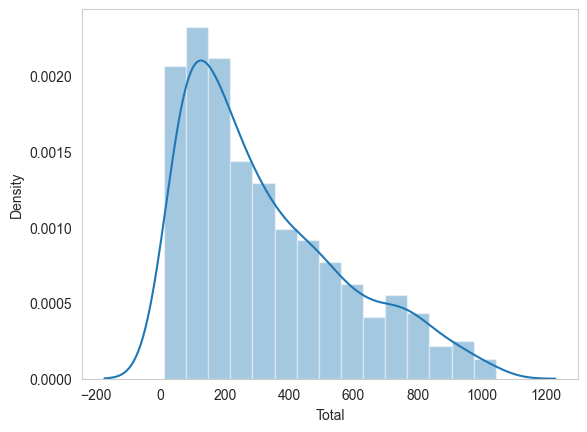

In [33]:
sns.distplot(df['Total'])
plt.grid(False)

# Total Invoices By Customer Type

Text(0.5, 1.0, 'Total Invoices By Customer type')

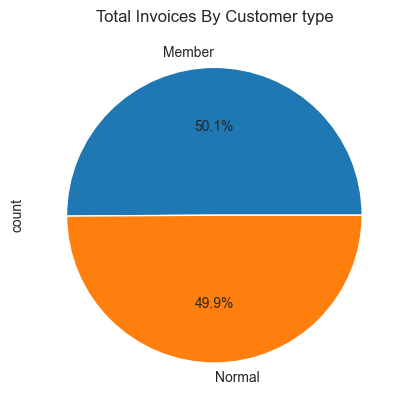

In [34]:
df['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Invoices By Customer type')  

# Total Invoices By Payment Method

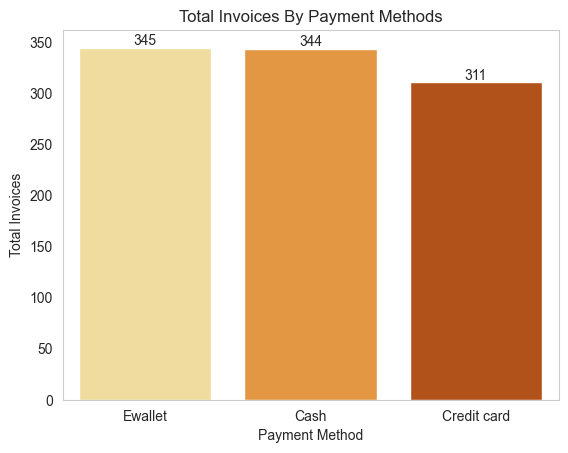

In [35]:
pm=sns.countplot(x='Payment', data=df, palette='YlOrBr')
for bars in pm.containers:
    pm.bar_label(bars)
plt.title('Total Invoices By Payment Methods')  
plt.xlabel('Payment Method')
plt.ylabel('Total Invoices')
plt.grid(False)

In [36]:
rating_avg=df.groupby('Product line')['Rating'].mean().sort_values(ascending=True)
rating_avg

Product line
Home and lifestyle        6.837500
Sports and travel         6.916265
Electronic accessories    6.924706
Health and beauty         7.003289
Fashion accessories       7.029213
Food and beverages        7.113218
Name: Rating, dtype: float64

In [37]:
rating_avg_r = rating_avg.round(1)
rating_avg_r

Product line
Home and lifestyle        6.8
Sports and travel         6.9
Electronic accessories    6.9
Health and beauty         7.0
Fashion accessories       7.0
Food and beverages        7.1
Name: Rating, dtype: float64

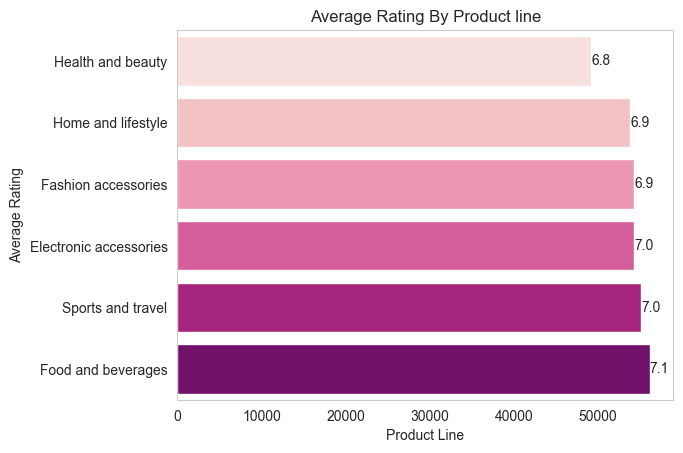

In [38]:
bar4= sns.barplot(x=total_by_product_r.values, y=total_by_product_r.index, orient='horizontal', palette='RdPu')
plt.bar_label(bar4.containers[0], labels=rating_avg_r.values, label_type='edge')
plt.title('Average Rating By Product line')  
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Insights

* Total Invoices generated are 1000, out of which 501 are Female & 499 are Male
* There isn't much difference in the invoices generated by all three branches, same goes for all three different cities, not much difference
* Sales were more in January
* Fashion Accessories has most sales followed by Food & beverages, female buyer were more in this case
* Female buyer spend more money than Male
* Average Unit price of Fashion Accessories were more, followed by Sports & Travel
* Electronic Accessories products were ordered in highest Quantity, followed by Fashion Accessories
* Highest Amount was generated by Fashion Accessories, then Sports & Travel
* Ewallet was the preferred payment method
* Food & Beverages has the highest Rating